# Libraries Import

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from  sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score,confusion_matrix
from  sklearn.tree import DecisionTreeClassifier

# Data Import and Preprocessing

In [35]:
names = ['distance_of_the_route_Km','longitude','latitude','body_characteristic_length','fuel_l','sensors', 'Rating']

In [36]:
df = pd.read_csv("BookMod.csv", names=names, header=0)
df.head()


,distance_of_the_route_Km,longitude,latitude,body_characteristic_length,fuel_l,sensors,Rating
0,100,54,10,23,50,12,High
1,40,57,8,19,25,10,Lowest
2,120,55,8,39,55,17,Highest
3,70,50,7,34,40,15,Low
4,90,59,9,28,45,13,Low


In [37]:
df.head(20)

,distance_of_the_route_Km,longitude,latitude,body_characteristic_length,fuel_l,sensors,Rating
0,100,54,10,23,50,12,High
1,40,57,8,19,25,10,Lowest
2,120,55,8,39,55,17,Highest
3,70,50,7,34,40,15,Low
4,90,59,9,28,45,13,Low
5,95,53,10,34,45,15,high
6,45,52,9,19,25,10,Lowest
7,115,55,9,39,50,17,Highest
8,60,51,9,34,40,12,Low
9,80,52,10,28,40,13,Low


In [38]:
df.shape


(56, 7)

In [39]:
df.describe()

,distance_of_the_route_Km,longitude,latitude,body_characteristic_length,fuel_l,sensors
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,76.785714,54.642857,8.428571,29.142857,40.000000,13.142857
std,29.763134,2.792383,1.412376,7.805426,10.444659,2.610667
min,30.000000,50.000000,6.000000,19.000000,25.000000,10.000000
25%,45.000000,52.000000,7.000000,19.000000,25.000000,10.000000
50%,82.500000,55.000000,9.000000,31.000000,42.500000,13.000000
75%,100.000000,57.000000,10.000000,34.000000,50.000000,15.000000
max,120.000000,59.000000,10.000000,39.000000,55.000000,17.000000


In [40]:
df.columns


Index(['distance_of_the_route_Km', 'longitude', 'latitude',
       'body_characteristic_length', 'fuel_l', 'sensors', 'Rating'],
      dtype='object')

In [41]:

df.groupby('Rating').size()


Rating
High        4
Highest    12
Low        20
Lowest     16
high        4
dtype: int64

In [53]:
data = df.values
data[0:20]

array([[100, 54, 10, 23, 50, 12, 'High'],
       [40, 57, 8, 19, 25, 10, 'Lowest'],
       [120, 55, 8, 39, 55, 17, 'Highest'],
       [70, 50, 7, 34, 40, 15, 'Low'],
       [90, 59, 9, 28, 45, 13, 'Low'],
       [95, 53, 10, 34, 45, 15, 'high'],
       [45, 52, 9, 19, 25, 10, 'Lowest'],
       [115, 55, 9, 39, 50, 17, 'Highest'],
       [60, 51, 9, 34, 40, 12, 'Low'],
       [80, 52, 10, 28, 40, 13, 'Low'],
       [85, 59, 6, 34, 45, 13, 'Low'],
       [35, 55, 7, 19, 25, 10, 'Lowest'],
       [110, 55, 10, 39, 50, 17, 'Highest'],
       [30, 58, 6, 19, 25, 10, 'Lowest'],
       [100, 54, 10, 23, 50, 12, 'High'],
       [40, 57, 8, 19, 25, 10, 'Lowest'],
       [120, 55, 8, 39, 55, 17, 'Highest'],
       [70, 50, 7, 34, 40, 15, 'Low'],
       [90, 59, 9, 28, 45, 13, 'Low'],
       [95, 53, 10, 34, 45, 15, 'high']], dtype=object)

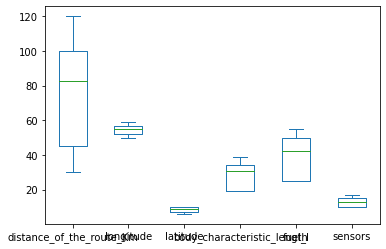

In [68]:
df.plot(kind='box', subplots=False, sharex=False, sharey=False)

# Spliting Data & Creating the Model

In [54]:
X = data[:,0:6] #split the code
Y = data[:,6]

In [44]:
# Data without Label
X[0:10]

array([[100, 54, 10, 23, 50, 12],
       [40, 57, 8, 19, 25, 10],
       [120, 55, 8, 39, 55, 17],
       [70, 50, 7, 34, 40, 15],
       [90, 59, 9, 28, 45, 13],
       [95, 53, 10, 34, 45, 15],
       [45, 52, 9, 19, 25, 10],
       [115, 55, 9, 39, 50, 17],
       [60, 51, 9, 34, 40, 12],
       [80, 52, 10, 28, 40, 13]], dtype=object)

In [45]:
# Label of the Data
Y[0:10]

array(['High', 'Lowest', 'Highest', 'Low', 'Low', 'high', 'Lowest',
       'Highest', 'Low', 'Low'], dtype=object)

In [46]:
test_size = 0.2
seed = 6

In [47]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=test_size, random_state=seed)
# random_state is the seed of the random number generator

In [57]:
model = DecisionTreeClassifier()

In [60]:
# Fit the model on training data
model = model.fit(X_train, Y_train)


In [61]:
# Check the accuracy of the model on training data

accuracy = model.score(X_test, Y_test)
print(accuracy)

1.0


In [51]:
# Predict the labels of the test data

predictions = model.predict([[85,59,6,34,45,13]])
print(predictions)

['Low']


In [66]:
# Predict for a group of trucks which one will lead

trucks = {
    "Truck1": [85,59,6,34,45,13],
    "Truck2": [115, 55, 9, 39, 50, 17],
    "Truck3": [100, 54, 10, 23, 50, 12],
    "Truck4": [35, 55, 7, 19, 25, 10],
}

# Predict the labels of the test data and return the result

for truck, data in trucks.items():
    print(truck, model.predict([data]))
    
    if model.predict([data]) == "Highest":
        leadTruck = truck
        
print("\n")        
print("The", leadTruck, "can be the leading truck")


Truck1 ['Low']
Truck2 ['Highest']
Truck3 ['High']
Truck4 ['Lowest']


The Truck2 can be the leading truck
